In [3]:
# Facebook page analysis starter
import html
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# load facebook dataset: Australian cosmetics company page
df = pd.read_csv("https://raw.githubusercontent.com/multidis/hult-social-media-analytics/main/data/brand_posts.csv")
df

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...


# What types of posts?


In [5]:
#Types of posts
df["type"].unique()

array(['photo', 'video', 'link', 'status'], dtype=object)

In [6]:
#how may entries of each post type are present.
for tp in df["type"].unique():
    ntp = len(df[df["type"] == tp])
    print(f"There are {ntp} of {tp} posts")

There are 1967 of photo posts
There are 42 of video posts
There are 20 of link posts
There are 15 of status posts


Photos are the higher number of posts type followed by videos. However, difference between photo types and other data types is very huge. 

# Which post types are liked more?

In [7]:
# average likes of each post type
for tp in df["type"].unique():
    like = df[df["type"] == tp]["likes_count"].mean()
    print(f"Average like for {tp} is {int(like)}")

Average like for photo is 113
Average like for video is 14
Average like for link is 40
Average like for status is 28


The most appreciated post type for cosmetics industry is photo that has the more average likes compared to other post types. 

# What text to post?

In [8]:
#Analyze the most common keywords occurring throughout the posts and visualize your results
stop_words = set(stopwords.words('english'))

def text_cleanup(s):
    # if not a string object, disregard
    if not isinstance(s, str):
        return ''
    
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [9]:
# Adding clean text column

df['message_clean'] = df['message'].apply(text_cleanup)
df

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....,ummm yum would ultimate naughty treat
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...,click worry 3 3
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...,seems like celebs get away hair colour check n...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN,absolutely adore bling australis hq nothing ma...
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN,know want p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...,porcelain princess cant find foundation light ...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...,blend velourlips achieve perfect bold lip insp...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...,free brush alert help start year flawless face...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...,add glow look high life highlighting powder ed...


In [10]:
# combining posts
text_all = ' '.join(df['message_clean'])

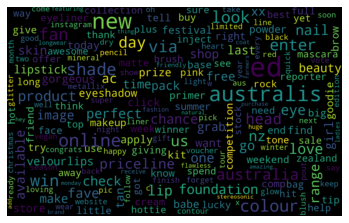

In [11]:
# keywords occurring throughout all of the posts
wc = WordCloud(width=1600, height=1000, max_font_size=130, collocations=False).generate(text_all)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In short, the keyword australis is the most frequently used keyword. 

# when to post

In [12]:
# slicing the comments column, top most commented entries 

dftop = df.sort_values(by='comments_count', ascending=False).head(20)
dftop[['created_time', 'comments_count']]

,created_time,comments_count
1367,2014-09-24 19:30:00,2241
1419,2014-12-03 19:30:01,679
1972,2016-10-16 17:00:00,627
1764,2016-01-29 13:10:31,624
1315,2014-08-11 18:35:00,603
1196,2014-06-10 16:45:01,587
1502,2015-03-12 18:00:01,583
1394,2014-10-27 20:00:00,538
1984,2016-10-30 16:45:00,521
1365,2014-09-19 16:30:01,504


In [13]:
dftop

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
1367,2014-09-24 19:30:00,Get ready � Oh Hai Brow is coming. Want to try...,photo,NaN,805,2241,95,0.0,0.0,0.0,0.0,0.0,Crystal Kells Tash On Carly Kenny Samie Nichol...,get ready oh hai brow coming want try anyone e...
1419,2014-12-03 19:30:01,"Christmas is about giving, so we�re giving you...",photo,NaN,495,679,56,0.0,0.0,0.0,0.0,0.0,So she can do her own brows and add some colou...,christmas giving giving chance win 2 australis...
1972,2016-10-16 17:00:00,Oh yes! Here's the game changer....our NEW Mat...,photo,NaN,1214,627,42,87.0,1.0,48.0,0.0,0.0,Kayleigh Christ Josie Ponsonby Doan Hoang Niki...,oh yes game changer new match maker shade adju...
1764,2016-01-29 13:10:31,Did you guess? <ed><U+00A0><U+00BC><ed><U+00BD...,photo,NaN,1875,624,35,0.0,0.0,0.0,0.0,0.0,Amy Morley Emma Skinner Sarah Di Iorio yasss L...,guess ed ed ed ed ed ed
1315,2014-08-11 18:35:00,To celebrate the release of our 2 awesome new ...,photo,Australis Cosmetics with Tracy Martens and 7 o...,723,603,60,0.0,0.0,0.0,0.0,0.0,Mash up is my fav because it has just the righ...,celebrate release 2 awesome new colour inject ...
1196,2014-06-10 16:45:01,The weather is getting cold but that doesn't m...,photo,NaN,708,587,60,0.0,0.0,0.0,0.0,0.0,I use a thicker lip balm and switch out my lip...,weather getting cold mean ca look hot giving c...
1502,2015-03-12 18:00:01,Are you lovin� Velourlips? Here's your chance ...,photo,NaN,462,583,40,0.0,0.0,0.0,0.0,0.0,everywhere To work of course! when dropping th...,lovin velourlips chance win five new shades ma...
1394,2014-10-27 20:00:00,It�s your last chance to snag some Popbasic sw...,photo,NaN,188,538,14,0.0,0.0,0.0,0.0,0.0,26 products :) 24 28 23 <U+2661> 21 30 :) xxx ...,last chance snag popbasic swag chance win sold...
1984,2016-10-30 16:45:00,Time to turn all those foundations that are 'n...,photo,NaN,849,521,36,45.0,0.0,27.0,0.0,0.0,Amanda Mel Stralow Elizabeth Paulino Gina prob...,time turn foundations right right ed ed drops ...
1365,2014-09-19 16:30:01,"Oh hai, Oh Hai Brow Kit! To celebrate this upc...",photo,NaN,482,504,180,0.0,0.0,0.0,0.0,0.0,Yes please Love Australis Cosmetics and I coul...,oh hai oh hai brow kit celebrate upcoming laun...


Thus, we analyzed that the cosmetic industry should post its content on 7:30 pm, however, its not known that what type of post should they come up with? 

In [14]:
# slicing the comments column, top most liked entries 

dftop = df.sort_values(by='likes_count', ascending=False).head(20)
dftop[['created_time', 'likes_count']]

,created_time,likes_count
218,2012-11-12 16:09:18,3601
27,2012-07-10 10:07:22,2997
130,2012-09-19 11:23:15,2496
209,2012-11-08 09:40:34,2462
36,2012-07-16 17:15:59,2329
17,2012-07-03 10:48:12,2095
1764,2016-01-29 13:10:31,1875
199,2012-11-01 17:53:15,1774
22,2012-07-05 15:59:10,1556
1893,2016-07-07 20:37:00,1510


In [20]:
dftop['type'].unique()

array(['photo'], dtype=object)

In [22]:
#Identify the top-10 posts that was shared most.

# slicing the shares_count column 
#df [  ['message_clean', 'shares_count']  ].head(n=10)

dftop = df.sort_values(by='shares_count', ascending=False).head(10)
dftop[['created_time', 'message_clean', 'shares_count']]

,created_time,message_clean,shares_count
1365,2014-09-19 16:30:01,oh hai oh hai brow kit celebrate upcoming laun...,180
218,2012-11-12 16:09:18,us hit like agree xx,166
209,2012-11-08 09:40:34,know way somewhere awesome life,155
130,2012-09-19 11:23:15,apparently ryan gosling coming australia click...,143
36,2012-07-16 17:15:59,us today seem super long click also think real...,116
1367,2014-09-24 19:30:00,get ready oh hai brow coming want try anyone e...,95
39,2012-07-18 10:40:06,3 audrey,87
1,2012-06-21 15:09:46,click worry 3 3,80
540,2013-05-22 17:47:41,right something think make little trip kitchen...,78
1715,2015-11-30 17:37:01,christmas sharing giving 3 fans chance win x2 ...,73


In [23]:
dftop['type'].unique()

array(['photo'], dtype=object)

# User Engagement Analysis.

In [15]:
#Identify the top-10 posts that received the most likes.

# slicing the likes column 
#df [  ['message_clean', 'likes_count']  ].head(n=10)

dftop = df.sort_values(by='likes_count', ascending=False).head(10)
dftop[['created_time', 'message_clean', 'likes_count']]

,created_time,message_clean,likes_count
218,2012-11-12 16:09:18,us hit like agree xx,3601
27,2012-07-10 10:07:22,click wish brush collection looked like,2997
130,2012-09-19 11:23:15,apparently ryan gosling coming australia click...,2496
209,2012-11-08 09:40:34,know way somewhere awesome life,2462
36,2012-07-16 17:15:59,us today seem super long click also think real...,2329
17,2012-07-03 10:48:12,hair idea today randomly braid tiny sections h...,2095
1764,2016-01-29 13:10:31,guess ed ed ed ed ed ed,1875
199,2012-11-01 17:53:15,true lovelies xx,1774
22,2012-07-05 15:59:10,click like know sleep sometimes way tired care,1556
1893,2016-07-07 20:37:00,well well well new toys way fans find range on...,1510


The post 218 that is created on 4:09 p.m. has the most likes

In [21]:
dftop['type'].unique()

array(['photo'], dtype=object)

In [16]:
# top-liked entries
df.sort_values(by='likes_count', ascending=False).head(10)


,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
218,2012-11-12 16:09:18,Who's with us?! Hit LIKE if you agree! xx,photo,Australis Cosmetics with Bhaona Gosai and 7 ot...,3601,35,166,0.0,0.0,0.0,0.0,0.0,<3 it Except for those girls that like other g...,us hit like agree xx
27,2012-07-10 10:07:22,Click 'like' if you wish your make-up brush co...,photo,NaN,2997,54,13,0.0,0.0,0.0,0.0,0.0,HAHAH MINE IS :) although i am a MUA. no but i...,click wish brush collection looked like
130,2012-09-19 11:23:15,Apparently Ryan Gosling is coming to Australia...,photo,NaN,2496,33,143,0.0,0.0,0.0,0.0,0.0,Poor Stacey would be devastated to learn that ...,apparently ryan gosling coming australia click...
209,2012-11-08 09:40:34,'Share' this if you KNOW you're on your way to...,photo,NaN,2462,10,155,0.0,0.0,0.0,0.0,0.0,me to france. 4 me. an japan. an all ova europ...,know way somewhere awesome life
36,2012-07-16 17:15:59,"Is it just us, or did today seem SUPER long? C...",photo,Australis Cosmetics with Danielle Mcdonald and...,2329,76,116,0.0,0.0,0.0,0.0,0.0,awesome . yyyaammiiiii YUMMYyyyyyyyyyyyyyyyyyy...,us today seem super long click also think real...
17,2012-07-03 10:48:12,Hair idea for today! Randomly braid tiny secti...,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,2095,29,71,0.0,0.0,0.0,0.0,0.0,I Want Her Hair! Its So Pretty! <3 thats sick ...,hair idea today randomly braid tiny sections h...
1764,2016-01-29 13:10:31,Did you guess? <ed><U+00A0><U+00BC><ed><U+00BD...,photo,NaN,1875,624,35,0.0,0.0,0.0,0.0,0.0,Amy Morley Emma Skinner Sarah Di Iorio yasss L...,guess ed ed ed ed ed ed
199,2012-11-01 17:53:15,"Too true, lovelies! xx",photo,NaN,1774,7,70,0.0,0.0,0.0,0.0,0.0,Amen to that nice pic :] yea hard hehe <3 :) T...,true lovelies xx
22,2012-07-05 15:59:10,Click like if you KNOW you shouldn't sleep wit...,photo,NaN,1556,35,7,0.0,0.0,0.0,0.0,0.0,"I never sleep with foundation on, but sometime...",click like know sleep sometimes way tired care
1893,2016-07-07 20:37:00,"Well, well, well - what do we have here? New t...",photo,NaN,1510,305,25,92.0,0.0,38.0,0.0,0.0,Laura McEvey BRUSHES!!! Haylee Mills <ed><U+00...,well well well new toys way fans find range on...


In [17]:
# top-liked entries: combined text
text_liked = ' '.join(df.sort_values(by='likes_count', ascending=False)['message_clean'].head(10))
text_liked
# proceed generating a word cloud as before

'us hit like agree xx click wish brush collection looked like apparently ryan gosling coming australia click like us right overly excited know way somewhere awesome life us today seem super long click also think really need yummy rainbow cake right hair idea today randomly braid tiny sections hair totally awesome donut bun great guide mastering donut bun guess ed ed ed ed ed ed true lovelies xx click like know sleep sometimes way tired care well well well new toys way fans find range online via ed ed'

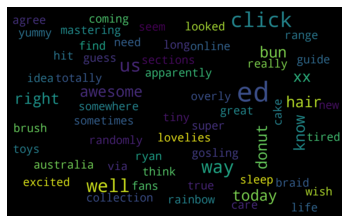

In [18]:
# keywords within the text of those posts.
wc = WordCloud(width=1600, height=1000, max_font_size=130, collocations=False).generate(text_liked)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

These are some keywords that the cosmetics industry used when posting the data types on their Facebook platform at 4:09 p.m. 